Use the code below, to identify where in the synergy/redundancy map the TSE complexity should be plotted, i.e.:
For a given list of TC and MI coordinates, this code outputs a transformed list of S and R coordinates.

In [13]:
import matplotlib.pyplot as plt

In [18]:
def transform_coordinates(coordinates):
    transformed = []
    for tc, mi in coordinates:
        s = (tc - mi) / 2
        r = (tc + mi) / 2
        transformed.append((s, r))
    return transformed

def normalize_coordinates(coords):
    xs, ys = zip(*coords)  # Unzip into separate x and y lists
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    
    normalized = [((x - min_x) / (max_x - min_x), (y - min_y) / (max_y - min_y)) for x, y in coords]
    return normalized

def plot_coordinates(coords):
    xs, ys = zip(*coords)  # Separate the x and y values
    
    plt.scatter(xs, ys, color='blue', marker='o')
    for i, (x, y) in enumerate(coords, start=1):
        plt.text(x, y, f'x{i}', fontsize=9, ha='right', va='bottom')
    
    plt.title('Relative synergy/redundancy distribution')
    plt.xlabel('Relative Synergy')
    plt.ylabel('Relative Redundancy')
    plt.grid(True)
    plt.show()

List of coordinates (Relative Synergy,  Relative Redundancy): 
 [(-3.5, 4.5), (3.5, -1.5), (0.5, 2.5), (2.5, 0.5), (1.5, 6.5), (4.5, 3.5)]
List of normalized coordinates (Relative Synergy,  Relative Redundancy): 
 [(0.0, 0.75), (0.875, 0.0), (0.5, 0.5), (0.75, 0.25), (0.625, 1.0), (1.0, 0.625)]


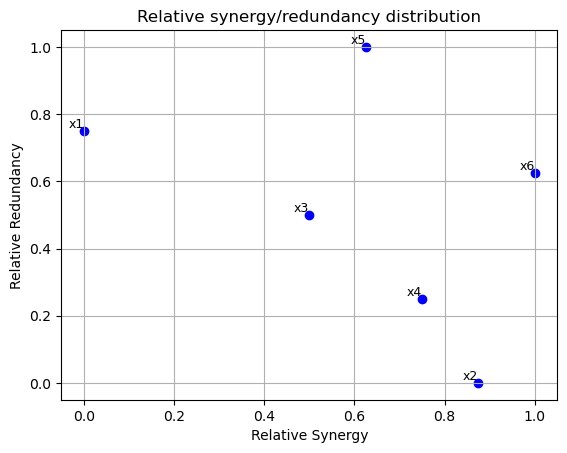

In [28]:
# Example usage
TC_MI_coordinates = [(1, 8), (2, -5), (3, 2), (3, -2), (8, 5), (8, -1)]
S_R_coordinates = transform_coordinates(TC_MI_coordinates)
print(f'List of coordinates (Relative Synergy,  Relative Redundancy): \n {S_R_coordinates}')

normalized_S_R_coordinates = normalize_coordinates(S_R_coordinates)
print(f'List of normalized coordinates (Relative Synergy,  Relative Redundancy): \n {normalized_S_R_coordinates}')

plot_coordinates(normalized_S_R_coordinates)

In [1]:
import matplotlib.pyplot as plt

def normalize_coordinates(coords):
    xs, ys = zip(*coords)  # Unzip into separate x and y lists
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    
    normalized = [((x - min_x) / (max_x - min_x), (y - min_y) / (max_y - min_y)) for x, y in coords]
    return normalized

# Example usage
S_R_coordinates = [(1, 8), (2, -5), (3, 2), (3, -2), (8, 5), (8, -1)]
print(f'List of coordinates (Relative Synergy,  Relative Redundancy): \n {S_R_coordinates}')

normalized_S_R_coordinates = normalize_coordinates(S_R_coordinates)
print(f'List of normalized coordinates (Relative Synergy,  Relative Redundancy): \n {normalized_S_R_coordinates}')

List of coordinates (Relative Synergy,  Relative Redundancy): 
 [(1, 8), (2, -5), (3, 2), (3, -2), (8, 5), (8, -1)]
List of normalized coordinates (Relative Synergy,  Relative Redundancy): 
 [(0.0, 1.0), (0.14285714285714285, 0.0), (0.2857142857142857, 0.5384615384615384), (0.2857142857142857, 0.23076923076923078), (1.0, 0.7692307692307693), (1.0, 0.3076923076923077)]


In [3]:
import pandas as pd

def normalize_columns(df):
    # Normalize first column (index 0)
    min_x, max_x = df.iloc[:, 0].min(), df.iloc[:, 0].max()
    df.iloc[:, 0] = (df.iloc[:, 0] - min_x) / (max_x - min_x) if max_x != min_x else 0
    
    # Normalize second column (index 1)
    min_y, max_y = df.iloc[:, 1].min(), df.iloc[:, 1].max()
    df.iloc[:, 1] = (df.iloc[:, 1] - min_y) / (max_y - min_y) if max_y != min_y else 0
    
    return df

# Example usage
data = pd.DataFrame({
    'x': [1, 2, 3, 3, 8, 8],
    'y': [8, -5, 2, -2, 5, -1]
})

print("Original DataFrame:")
print(data)

# Normalize the first two columns
normalized_data = normalize_columns(data)

print("\nNormalized DataFrame:")
print(normalized_data)

Original DataFrame:
   x  y
0  1  8
1  2 -5
2  3  2
3  3 -2
4  8  5
5  8 -1

Normalized DataFrame:
          x         y
0  0.000000  1.000000
1  0.142857  0.000000
2  0.285714  0.538462
3  0.285714  0.230769
4  1.000000  0.769231
5  1.000000  0.307692


C:\Users\cyril\AppData\Local\Temp\ipykernel_6332\1233472987.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    0.000000
1    0.142857
2    0.285714
3    0.285714
4    1.000000
5    1.000000
Name: x, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0] = (df.iloc[:, 0] - min_x) / (max_x - min_x) if max_x != min_x else 0
C:\Users\cyril\AppData\Local\Temp\ipykernel_6332\1233472987.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    1.000000
1    0.000000
2    0.538462
3    0.230769
4    0.769231
5    0.307692
Name: y, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 1] = (df.iloc[:, 1] - min_y) / (max_y - min_y) if max_y != min_y else 0
